In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import os
for dirname, _, filenames in os.walk('fundamentals.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [5]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

date 		-	 0.0
symbol 		-	 0.0
open 		-	 0.0
close 		-	 0.0
low 		-	 0.0
high 		-	 0.0
volume 		-	 0.0


date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object


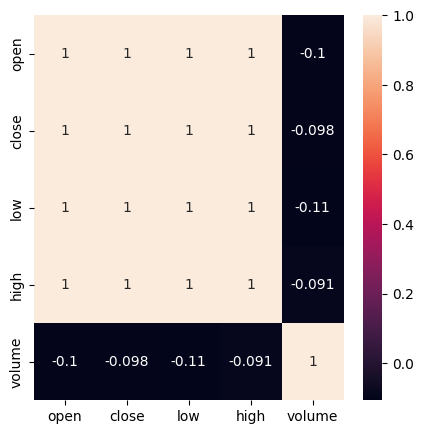

In [8]:
df = df[df['symbol'] == 'AAP']  # Choosing stock values for the company

# Check data types
print(df.dtypes)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  # Keep only numeric columns

# Calculate correlation
cormap = numeric_df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cormap, annot=True)
plt.show()

In [9]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [10]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [11]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [12]:
df.shape

(1762, 4)

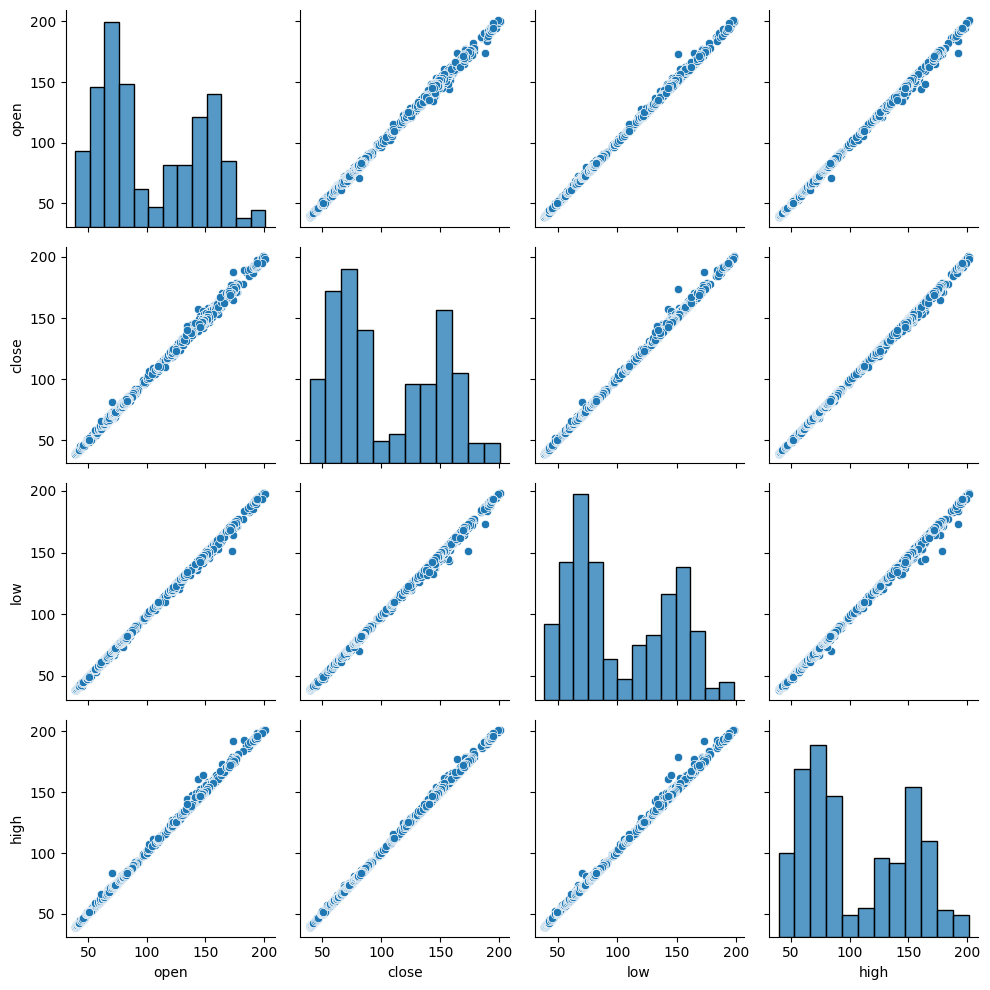

In [13]:
sns.pairplot(df)
plt.tight_layout()

In [14]:
X = df.drop(['close'], axis=1)
y = df['close']

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


# Prediction model


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# 1. Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [19]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


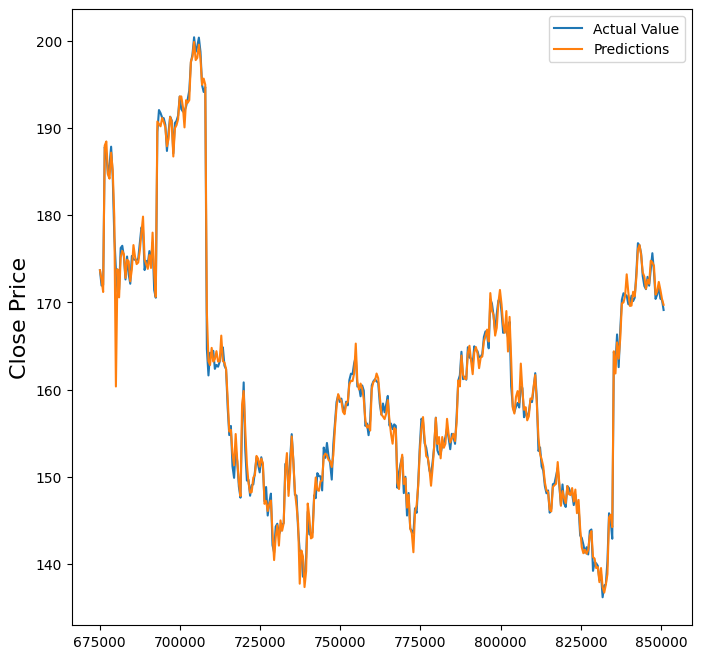

In [20]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 2. ANN

In [21]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [22]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70


/Users/saieeshwar/miniforge3/envs/ML/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6134.9839 - val_loss: 22085.3242
Epoch 2/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 5985.3140 - val_loss: 22006.7500
Epoch 3/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 6050.3774 - val_loss: 21637.0391
Epoch 4/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 5820.2241 - val_loss: 20360.2656
Epoch 5/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 5276.3091 - val_loss: 17246.6660
Epoch 6/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 4111.7285 - val_loss: 11790.9229
Epoch 7/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 2460.1387 - val_loss: 5345.5981
Epoch 8/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 808.8014 - val_loss: 1267.6392
Epoch 9/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 87.3818 - val_loss: 274.9984
Epoch 10/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 23.3331 - val_loss: 196.2008
Epoch 11/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 21.6110 - val_loss: 195.8188
Epo

In [23]:
y_pred_2 = model_2.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [24]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.947174
675608,171.919998,172.257339
676105,172.000000,170.471863
676602,187.789993,179.179611
677099,187.029999,187.983261


In [25]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9870498189277734


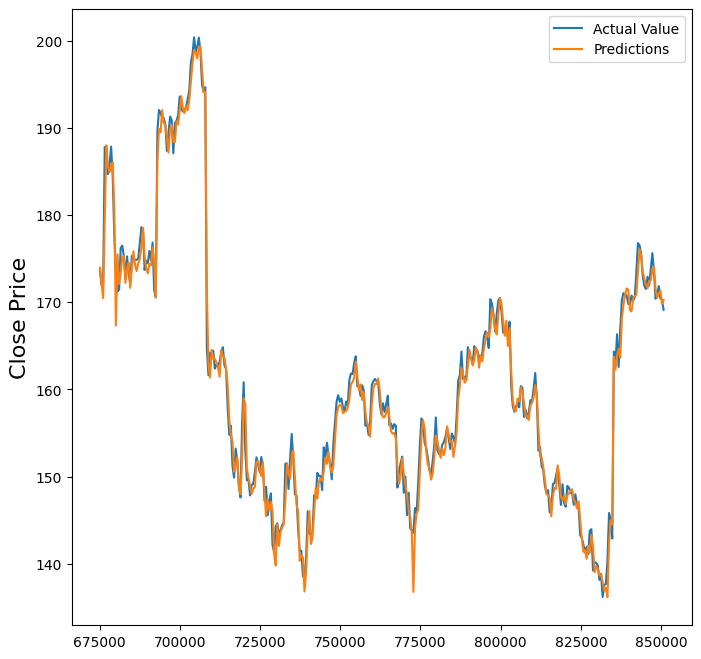

In [26]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 3. CNN

In [27]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [29]:
model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/Users/saieeshwar/miniforge3/envs/ML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5722.9312 - val_loss: 2602.2537
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 285.2513 - val_loss: 66.5212
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5843 - val_loss: 7.7506
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9563 - val_loss: 1.7451
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5290 - val_loss: 1.7134
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4553 - val_loss: 2.0339
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4075 - val_loss: 2.2281
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4284 - val_loss: 1.7170
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4954 - val_loss: 2.1577
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3962 - val_loss: 1.7681
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4192 - val_loss: 1.7491
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4599

In [30]:
y_pred_3 = model_3.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [31]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.649902
675608,171.919998,172.999390
676105,172.000000,171.199265
676602,187.789993,180.514984
677099,187.029999,188.973907


In [32]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9885731297967467


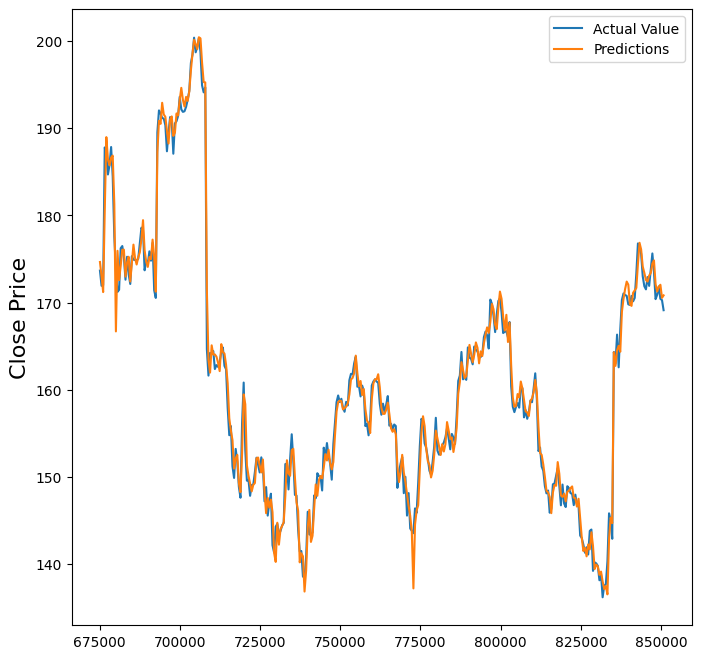

In [33]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

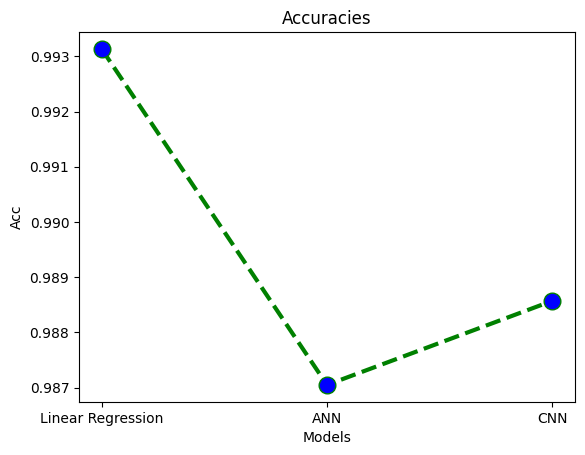

In [34]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

In [35]:
close = df.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

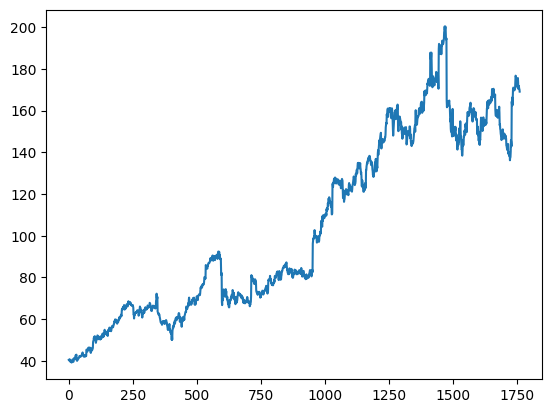

In [36]:
plt.plot(close)
plt.show()

In [37]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [38]:
print(X[:5])

[[40.380001 40.139999 40.490002 40.48     40.639999 40.240002 39.540001
  40.09     39.560001 39.310001 39.5      39.16     39.23     39.740002
  40.5      40.549999 40.59     39.77     39.450001 40.490002 41.189999
  41.189999 40.93     40.720001 40.810001 41.57     42.330002 42.549999
  42.810001 42.630001]
 [40.139999 40.490002 40.48     40.639999 40.240002 39.540001 40.09
  39.560001 39.310001 39.5      39.16     39.23     39.740002 40.5
  40.549999 40.59     39.77     39.450001 40.490002 41.189999 41.189999
  40.93     40.720001 40.810001 41.57     42.330002 42.549999 42.810001
  42.630001 42.880001]
 [40.490002 40.48     40.639999 40.240002 39.540001 40.09     39.560001
  39.310001 39.5      39.16     39.23     39.740002 40.5      40.549999
  40.59     39.77     39.450001 40.490002 41.189999 41.189999 40.93
  40.720001 40.810001 41.57     42.330002 42.549999 42.810001 42.630001
  42.880001 40.150002]
 [40.48     40.639999 40.240002 39.540001 40.09     39.560001 39.310001
  39.5  

In [39]:
print(y[:5])

[42.880001 40.150002 40.       40.240002 40.220001]


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


# Prediction

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# 1.LSTM

In [42]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/Users/saieeshwar/miniforge3/envs/ML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5492.3862 - val_loss: 1145.6825
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151.6631 - val_loss: 137.6267
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.2704 - val_loss: 75.3910
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.8007 - val_loss: 36.3491
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.7606 - val_loss: 33.3201
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.3394 - val_loss: 34.2866
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.4373 - val_loss: 39.7903
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.9238 - val_loss: 39.2615
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.0982 - val_loss: 33.0733
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.5444 - val_loss: 56.1068
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.3657 - val_loss: 29.6442
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

In [45]:
y_pred_1 = model_1.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [46]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,181.620987
1,185.770004,183.698639
2,187.839996,184.699875
3,184.449997,185.828430
4,177.539993,185.563950


In [47]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9164629893019043


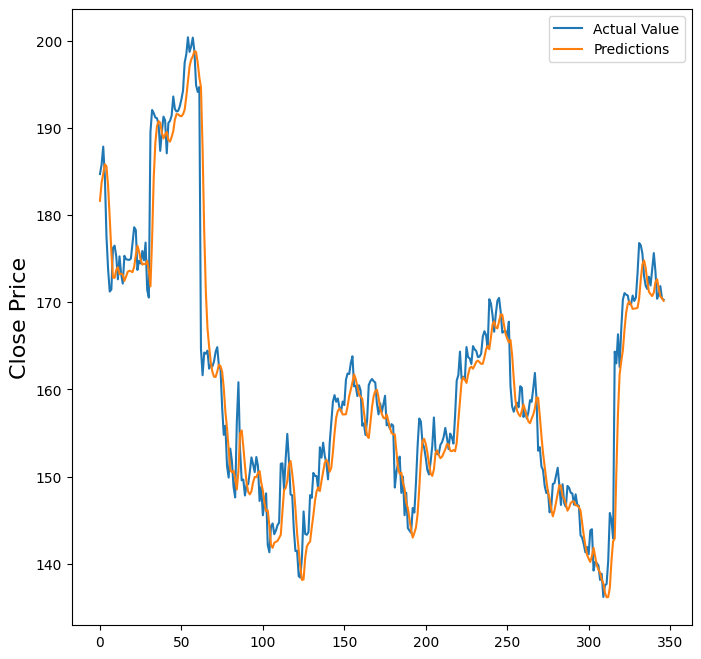

In [48]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 2. ANN

In [49]:
model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/Users/saieeshwar/miniforge3/envs/ML/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6233.7046 - val_loss: 22382.1680
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 6295.1743 - val_loss: 21778.5566
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 6107.4766 - val_loss: 18249.0039
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 4943.9814 - val_loss: 8430.6592
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 2366.8606 - val_loss: 58.2816
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 365.6241 - val_loss: 2018.7433
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 211.5748 - val_loss: 1352.9204
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 212.8964 - val_loss: 1352.5469
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 199.6893 - val_loss: 1301.2462
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 187.2546 - val_loss: 1205.1150
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 183.4060 - val_loss: 1241

In [50]:
y_pred_2 = model_2.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [51]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8247225594433911


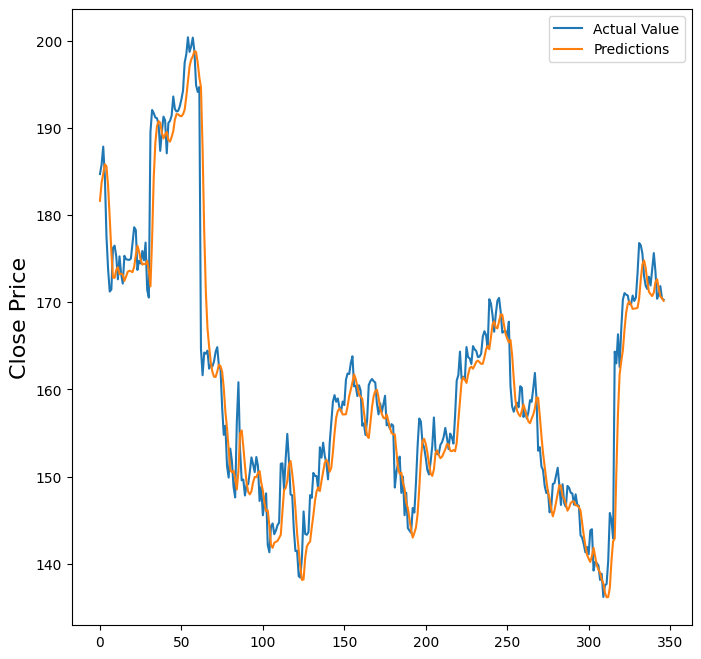

In [52]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 3. CNN

In [53]:
model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/Users/saieeshwar/miniforge3/envs/ML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4567.7461 - val_loss: 201.5601
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 130.7836 - val_loss: 242.0219
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.0243 - val_loss: 48.0052
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5843 - val_loss: 31.6169
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.9250 - val_loss: 31.0462
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.7732 - val_loss: 35.9771
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.9420 - val_loss: 32.9828
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.9728 - val_loss: 30.8191
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.3719 - val_loss: 33.9169
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0327 - val_loss: 29.3283
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.4070 - val_loss: 35.3032
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

In [54]:
y_pred_3 = model_3.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [55]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,193.397110
1,185.770004,193.593842
2,187.839996,194.271332
3,184.449997,195.774673
4,177.539993,195.010345


In [56]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.6734552085708247


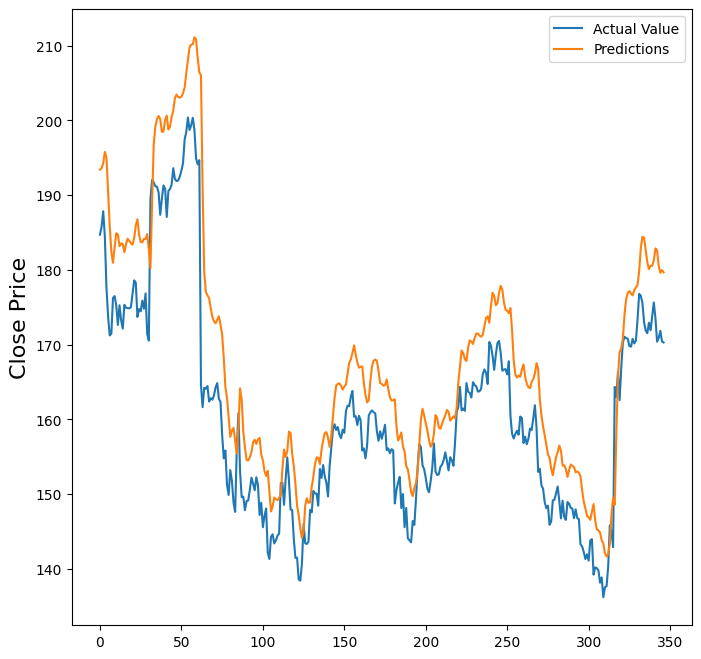

In [57]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

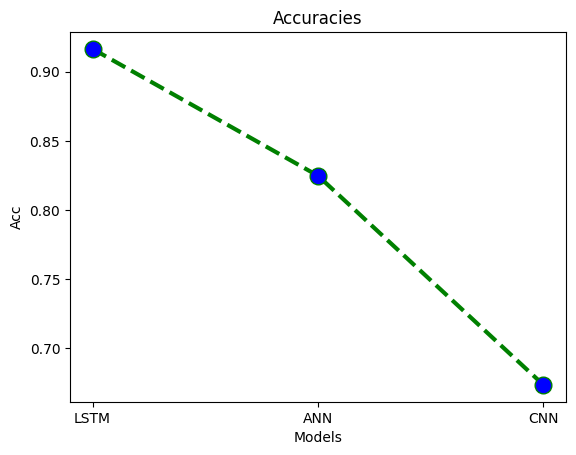

In [58]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()